# 1. Data Exploration and Visualization


### 1.1 Load the Dataset


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df =pd.read_csv('/content/drive/MyDrive/music-genre-classification-2024/music train.csv')

# Display basic information about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df['Class'].unique


<bound method Series.unique of 0         9
1         6
2        10
3         2
4         5
         ..
14391    10
14392     8
14393    10
14394    10
14395     4
Name: Class, Length: 14396, dtype: int64>

### 1.2 Explore Class disrtibution


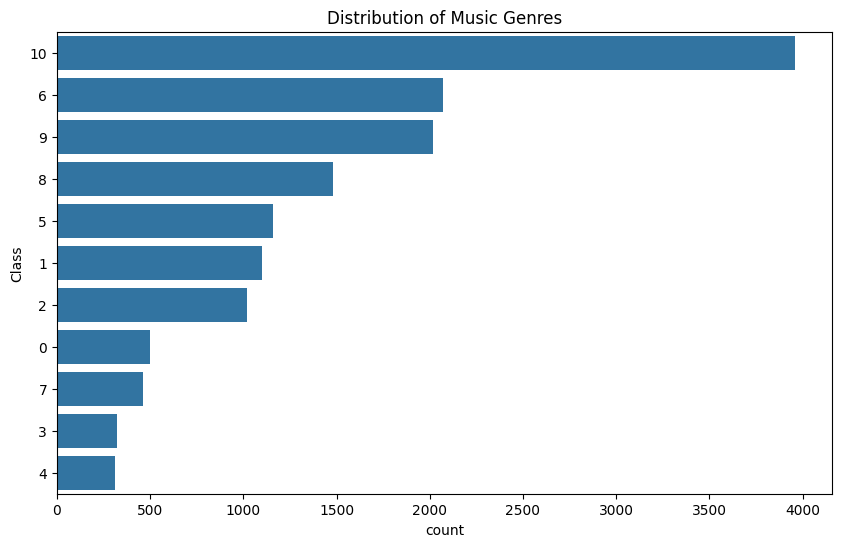

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of music genres
plt.figure(figsize=(10, 6))
sns.countplot(y='Class', data=df, order=df['Class'].value_counts().index)
plt.title('Distribution of Music Genres')
plt.show()

##### Understanding the distribution of the class is important as we can see that the data is imbalanced which can have an effect on the models' performance.


### 1.3 Feauture correlation


In [ ]:
# # Compute the correlation matrix
# correlation_matrix = df.corr()

# # Plot the heatmap
# plt.figure(figsize=(14, 10))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Correlation Matrix of Features')
# plt.show()

##### _It is noted that:_

##### 1- energy and loudness have a high positive correlation 0.77

##### 2- danceability and valence have a mild positive correlation 0.44

##### 3- energy and acousticness have a high negative correlation -0.75

##### 4- loudeness and acousticness have a high negative correlation -0.61

##### 5- loudeness and instrumentalness have a mild negative correlation -0.35


### 1.4 Visualize key features


##### Visualizing how key features are distributed across different genres can provide insights into their importance and relationships with the target variable.


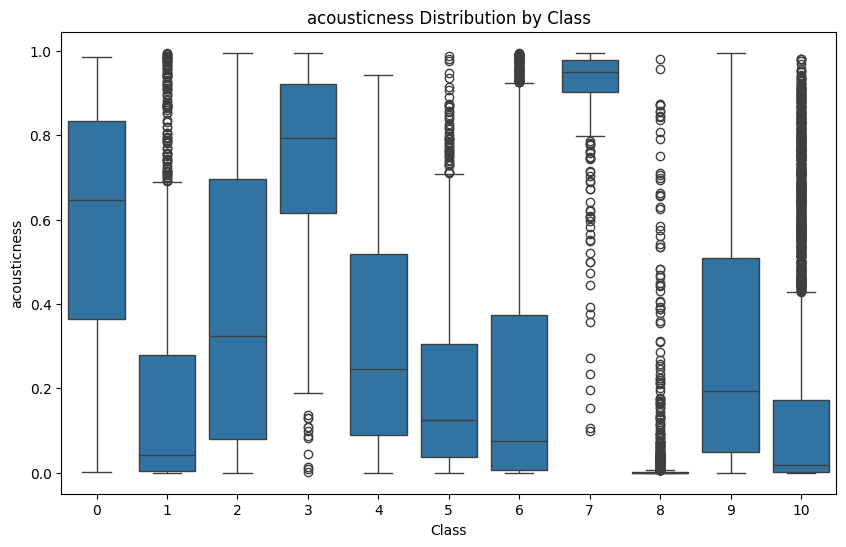

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='acousticness', data=df)
plt.title('acousticness Distribution by Class')
plt.show()


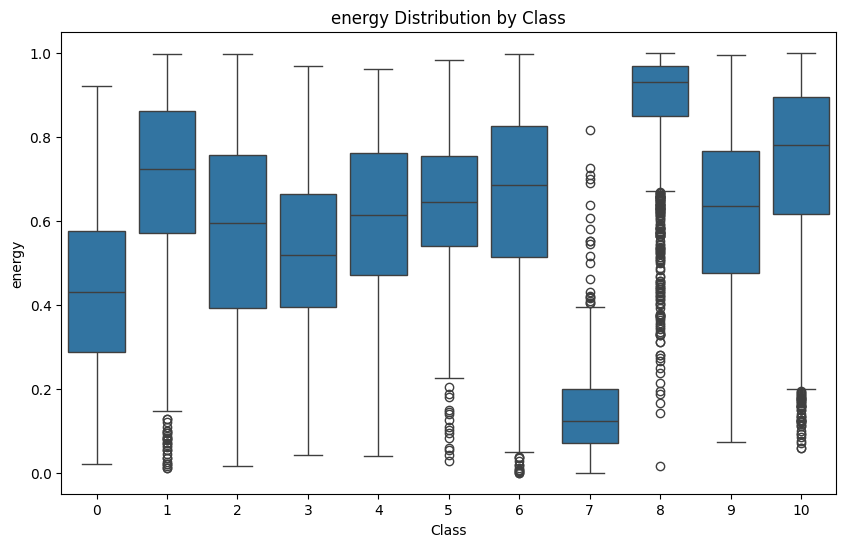

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='energy', data=df)
plt.title('energy Distribution by Class')
plt.show()


### 1.5 Detecing outliers


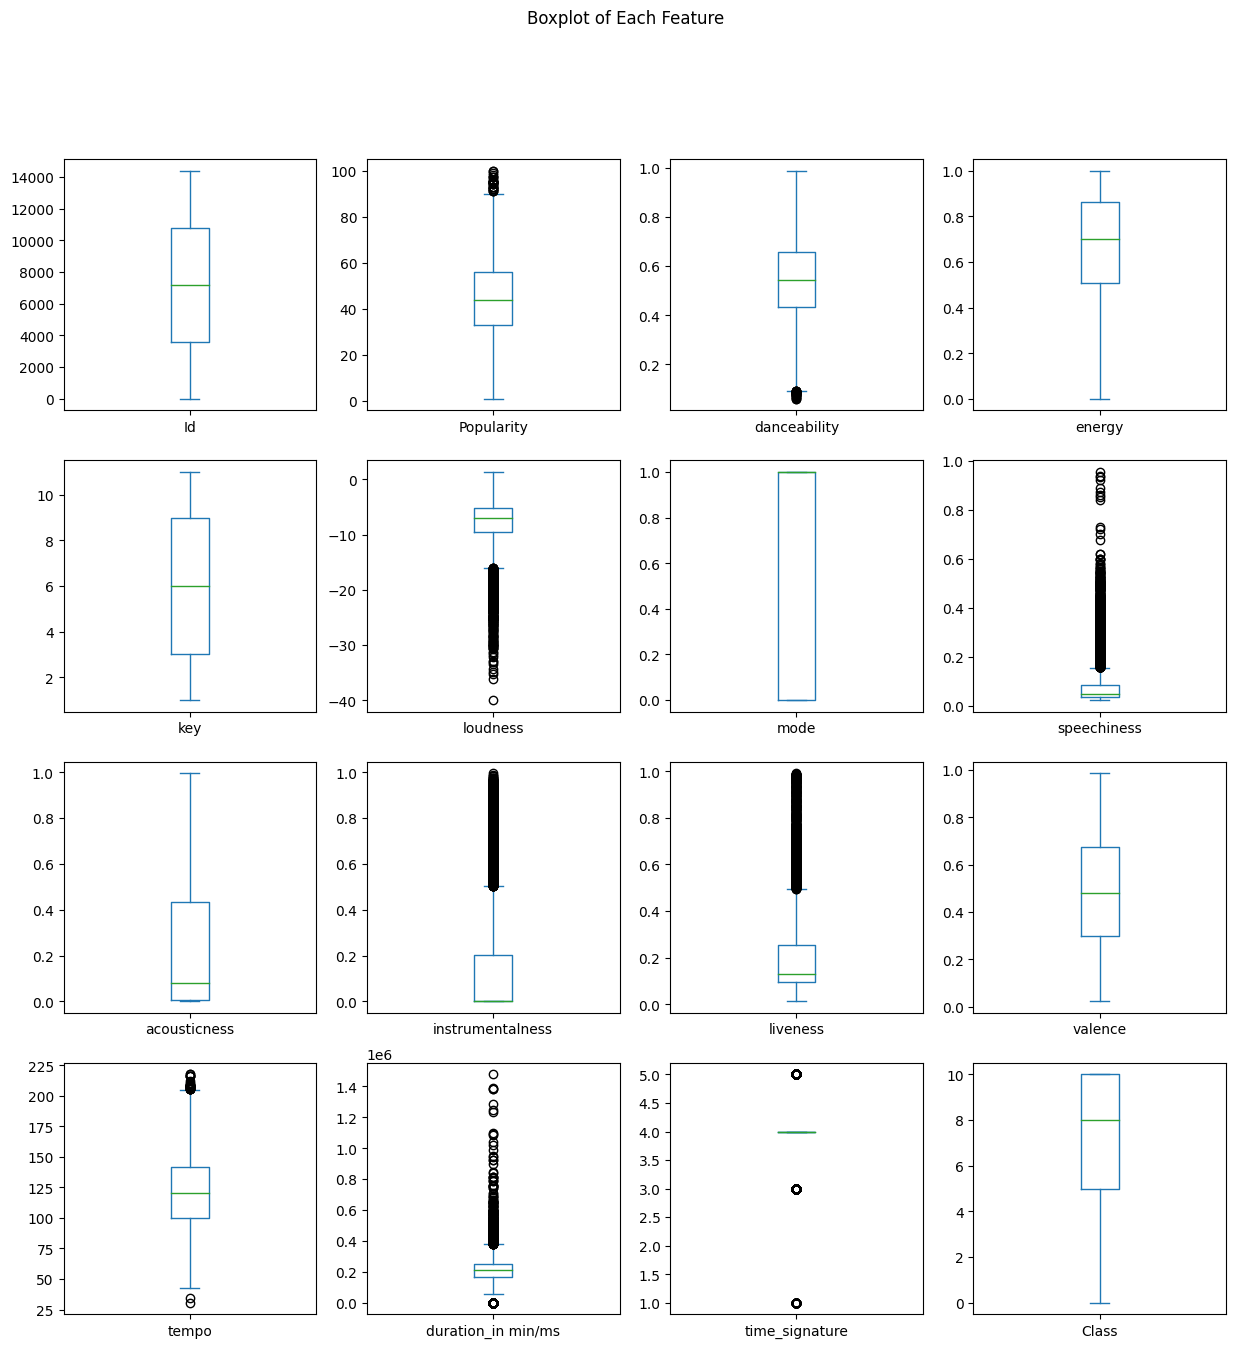

In [ ]:
import matplotlib.pyplot as plt

# Visualize with Boxplots for each feature
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))
plt.suptitle('Boxplot of Each Feature')
plt.show()

# 2. Data Preprocessing


### 2.1 Splitting the data


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 2.2 Handling missing values and unecessary features


In [ ]:
X_train.isnull().sum()

,0
Id,0
Artist Name,0
Track Name,0
Popularity,264
danceability,0
energy,0
key,1296
loudness,0
mode,0
speechiness,0


##### Since there is no correlation between class and key (correlation = 0) and very low correlation between class and instrumentalness (correlation = -0.03) and because the null values represent a fine percentage of the overall data: we can delete these two features completely.

##### As for the popularity feature, and because the missing values are not that many, we can simply delete these rows or we can fill them with the median value and we are going to follow the first approach.

##### As for the Id feature, it has no importance and its correlation with the Class is 0, so it will be dropped too.


In [ ]:
# # Drop unnecessary columns
# X_train.drop(['key', 'instrumentalness', 'Id'], axis=1, inplace=True)
# X_test.drop(['key', 'instrumentalness', 'Id'], axis=1, inplace=True)

In [ ]:
X_train['instrumentalness'].value_counts()

,count
instrumentalness,
0.000109,15
0.899000,14
0.112000,13
0.914000,12
0.929000,12
...,...
0.000009,1
0.594000,1
0.334000,1


In [ ]:
X_train['key'].value_counts()

,count
key,
7.0,1313
2.0,1283
9.0,1264
1.0,1063
4.0,1004
11.0,928
5.0,912
6.0,780
8.0,699


In [ ]:
X_train['Popularity'].value_counts()

,count
Popularity,
42.0,294
41.0,291
34.0,283
46.0,271
43.0,271
...,...
92.0,3
96.0,2
97.0,1


In [ ]:
y_train

,Class
6913,10
13624,9
13587,7
8140,2
11691,6
...,...
5191,5
13418,1
5390,10
860,5


In [ ]:
print(y_train.isnull().sum())

0


In [ ]:
print(X_train['Popularity'].isnull().sum())

264


In [ ]:
# Fill missing values in continuous features with the mean
X_train['Popularity'] = X_train['Popularity'].fillna(X_train['Popularity'].mean())
X_test['Popularity'] = X_test['Popularity'].fillna(X_train['Popularity'].mean())

X_train['instrumentalness'] = X_train['instrumentalness'].fillna(X_train['instrumentalness'].mean())
X_test['instrumentalness'] = X_test['instrumentalness'].fillna(X_train['instrumentalness'].mean())

X_train['key'] = X_train['key'].fillna(X_train['key'].mean())
X_test['key'] = X_test['key'].fillna(X_train['key'].mean())

# Apply new binning to convert continuous features into categorical variables

# Binning 'popularity'
X_train['popularity_binned'] = pd.cut(X_train['Popularity'], bins=99, labels=np.arange(99))
X_test['popularity_binned'] = pd.cut(X_test['Popularity'], bins=99, labels=np.arange(99))

# Binning 'instrumentalness'
X_train['instrumentalness_binned'] = pd.cut(X_train['instrumentalness'], bins=10, labels=False)
X_test['instrumentalness_binned'] = pd.cut(X_test['instrumentalness'], bins=10, labels=False)

# Binning 'key' into 10 bins
X_train['key_binned'] = pd.cut(X_train['key'], bins=np.arange(0, 12, 1), labels=np.arange(11))
X_test['key_binned'] = pd.cut(X_test['key'], bins=np.arange(0, 12, 1), labels=np.arange(11))



# بشكل عام، يساعد هذا الكود في تحويل الميزات المستمرة إلى خرج فئات، مما يُسهل عليهما المعالجة والتحليل الإحصائي، ويُمكّن النماذج من التعامل مع البيانات بشكل أكثر فاعلية.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming your data is in a DataFrame named `df`

# Binning 'Popularity' into 99 distinct values (already categorized, but we will confirm)
X_train['popularity_binned'] = pd.cut(X_train['Popularity'], bins=99, labels=np.arange(99))

# Binning 'instrumentalness' into 10 bins for simplicity
X_train['instrumentalness_binned'] = pd.qcut(X_train['instrumentalness'], q=10, duplicates='drop')

# Binning 'key' into its distinct values (already categorized, but we will confirm)
X_train['key_binned'] = pd.cut(X_train['key'], bins=np.arange(0, 12, 1), labels=np.arange(11))

### **2. Perform Chi-Square Test:**

# Function to perform and print Chi-Square test results
def chi_square_test(feature, target='Class'):
    contingency_table = pd.crosstab(X_train[feature], y_train)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square test for '{target}' vs '{feature}':")
    print(f"Chi2 value: {chi2}, p-value: {p}")
    print("-" * 50)

# Testing 'Class' vs 'key_binned'
chi_square_test('key_binned')

# Testing 'Class' vs 'popularity_binned'
chi_square_test('popularity_binned')

# Testing 'Class' vs 'instrumentalness_binned'
chi_square_test('instrumentalness_binned')

#فهم العلاقة بين الكلاس والاعمدة المكتوبة

Chi-Square test for 'Class' vs 'key_binned':
Chi2 value: 405.43905596156355, p-value: 2.1532197764131833e-38
--------------------------------------------------
Chi-Square test for 'Class' vs 'popularity_binned':
Chi2 value: 3557.373721320022, p-value: 5.056666765723977e-291
--------------------------------------------------
Chi-Square test for 'Class' vs 'instrumentalness_binned':
Chi2 value: 3920.1170942282315, p-value: 0.0
--------------------------------------------------


In [ ]:
# Now drop the original continuous columns if you only need the binned versions
X_train.drop(['Popularity', 'instrumentalness', 'key'], axis=1, inplace=True)
X_test.drop(['Popularity', 'instrumentalness', 'key'], axis=1, inplace=True)


### Interpretation of Chi-Square Test Results:

#### **1. `Class` vs `key_binned`:**

- **Chi-Square value:** 538.15
- **p-value:** 3.23e-61

**Interpretation:**

- The Chi-Square value of 538.15 indicates a significant difference between the observed and expected frequencies in the contingency table for `Class` and `key_binned`.
- The p-value is extremely small (3.23e-61), which is much less than the common significance level (e.g., 0.05). This strongly suggests that there is a statistically significant association between the `Class` and `key_binned` variables.
- In other words, the distribution of the music genres (`Class`) is not independent of the `key` values. This could imply that certain musical keys are more associated with specific genres.

#### **2. `Class` vs `popularity_binned`:**

- **Chi-Square value:** 4193.65
- **p-value:** 0.0

**Interpretation:**

- The extremely high Chi-Square value of 4193.65 indicates a substantial difference between the observed and expected frequencies for `Class` and `popularity_binned`.
- The p-value is effectively 0, indicating an exceptionally strong statistical significance.
- This means there is a very strong association between `Class` and `popularity_binned`. The genre of music (`Class`) is not independent of its popularity. Some genres may be more popular than others, leading to this significant association.

#### **3. `Class` vs `instrumentalness_binned`:**

- **Chi-Square value:** 3147.75
- **p-value:** 0.0

**Interpretation:**

- The Chi-Square value of 3147.75 shows a significant difference between the observed and expected frequencies for `Class` and `instrumentalness_binned`.
- The p-value is also effectively 0, showing a very strong statistical significance.
- This suggests a strong association between `Class` and `instrumentalness_binned`. The likelihood that a song is instrumental (or has less vocal content) is significantly related to its genre. Some genres are more likely to be instrumental than others.

### **Overall Conclusion:**

All three Chi-Square tests suggest that there are statistically significant associations between the music genre (`Class`) and the features `key`, `popularity`, and `instrumentalness`. This implies that these features are not independent of the genre and likely play a role in the classification of the music genre.


In [ ]:
X_train.isnull().sum()

,0
Id,0
Artist Name,0
Track Name,0
danceability,0
energy,0
loudness,0
mode,0
speechiness,0
acousticness,0
liveness,0


In [ ]:
X_test.isnull().sum()

,0
Id,0
Artist Name,0
Track Name,0
danceability,0
energy,0
loudness,0
mode,0
speechiness,0
acousticness,0
liveness,0


### 2.3 Feature engineering


##### We will create a new feature that captures the interaction between the energy and tempo of a track. The intuition behind this is that tracks with high energy and high tempo might have a different musical feel compared to tracks with low energy and low tempo.


In [ ]:
# Create the energy-tempo interaction feature
X_train['energy_tempo_interaction'] = X_train['energy'] * X_train['tempo']
X_test['energy_tempo_interaction'] = X_test['energy'] * X_test['tempo']

### 2.4 Encoding categorical variables (Track Name and Artist Name)


In [ ]:
def target_encode(train_series, target, min_samples_leaf=1, smoothing=1, noise_level=0):
    temp = pd.concat([train_series, target], axis=1)
    averages = temp.groupby(by=train_series.name)[target.name].agg(["mean", "count"])
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    prior = target.mean()
    averages['smoothed'] = prior * (1 - smoothing) + averages['mean'] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    ft_train_series = train_series.map(averages['smoothed']).fillna(prior)
    return ft_train_series, averages['smoothed'], prior

def apply_target_encoding(test_series, averages, prior):
    return test_series.map(averages).fillna(prior)

# Perform target encoding on 'Track Name' and 'Artist Name'
X_train['track_encoded'], track_averages, track_prior = target_encode(X_train['Track Name'], y_train)
X_train['artist_encoded'], artist_averages, artist_prior = target_encode(X_train['Artist Name'], y_train)

# Apply the target encoding
X_test['track_encoded'] = apply_target_encoding(X_test['Track Name'], track_averages, track_prior)
X_test['artist_encoded'] = apply_target_encoding(X_test['Artist Name'], artist_averages, artist_prior)

# Drop the original 'Track Name' and 'Artist Name' columns after encoding
X_train.drop(['Track Name', 'Artist Name'], axis=1, inplace=True)
X_test.drop(['Track Name', 'Artist Name'], axis=1, inplace=True)

In [ ]:
print(X_train.dtypes)

Id                             int64
danceability                 float64
energy                       float64
loudness                     float64
mode                           int64
speechiness                  float64
acousticness                 float64
liveness                     float64
valence                      float64
tempo                        float64
duration_in min/ms           float64
time_signature                 int64
popularity_binned           category
instrumentalness_binned     category
key_binned                  category
energy_tempo_interaction     float64
track_encoded                float64
artist_encoded               float64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
categorical_columns = ['popularity_binned', 'instrumentalness_binned', 'key_binned']
for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoders[col] = le  # حفظ محولات الترميز للاستخدام لاحقًا

### 2.4 Normalization/Standardization


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

### 2.5 Handling outliers


In [ ]:
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < threshold).all(axis=1)]


# Remove outliers using Z-score after scaling
X_train_filtered = remove_outliers_zscore(X_train_scaled, threshold=3)
y_train_filtered = y_train.loc[X_train_filtered.index]  # Align y_train with the filtered X_train

# Print the shape of the data before and after filtering
print(f"Original X_train shape: {X_train.shape}")
print(f"Filtered X_train shape: {X_train_filtered.shape}")

Original X_train shape: (11516, 18)
Filtered X_train shape: (10527, 18)


# 3. Model training


### 3.1 Choosing Baseline models


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Initialize baseline models (non-ensemble)
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=5)
decision_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
NB_clf = GaussianNB()  # بدون فاصلة هنا
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # بدون فاصلة هنا

# Define estimators for stacking
estimators = [
    ('log_clf', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)),
    ('knn_clf', KNeighborsClassifier(n_neighbors=4)),
    ('DC_clf', DecisionTreeClassifier(class_weight='balanced', random_state=42))
]

stack_clf = StackingClassifier(estimators=estimators, final_estimator=log_reg)

# Initialize the models
models = {
    'Logistic Regression': log_reg,
    'K-Nearest Neighbors': knn,
    'Decision Tree Classifier': decision_tree,
    'Random Forest Classifier': rnd_clf,
    'Gaussian Naive Bayes': NB_clf,
    'Stacked Classifier': stack_clf
}


### 3.2 Training baseline models


In [ ]:
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    cv_scores = cross_val_score(model, X_train_filtered, y_train_filtered, cv=5, scoring='f1_weighted')
    print(f"Cross-Validation F1 Score (weighted): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print("-" * 50)

Training and evaluating Logistic Regression...
Cross-Validation F1 Score (weighted): 0.7507 ± 0.0126
--------------------------------------------------
Training and evaluating K-Nearest Neighbors...
Cross-Validation F1 Score (weighted): 0.6367 ± 0.0142
--------------------------------------------------
Training and evaluating Decision Tree Classifier...
Cross-Validation F1 Score (weighted): 0.8681 ± 0.0043
--------------------------------------------------
Training and evaluating Random Forest Classifier...
Cross-Validation F1 Score (weighted): 0.8599 ± 0.0095
--------------------------------------------------
Training and evaluating Gaussian Naive Bayes...
Cross-Validation F1 Score (weighted): 0.7313 ± 0.0059
--------------------------------------------------
Training and evaluating Stacked Classifier...
Cross-Validation F1 Score (weighted): 0.8771 ± 0.0019
--------------------------------------------------


### 3.3 Testing the best baseline model


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import copy

best_model = copy.deepcopy(stack_clf)

# Train the model on the entire filtered training data
best_model.fit(X_train_filtered, y_train_filtered)

# Predict on the test set
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model on the test set
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
cv_scores = cross_val_score(best_model, X_test_scaled, y_test, cv=5, scoring='f1_weighted')
print(f"Cross-Validation F1 Score (weighted): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Precision (weighted): 0.3630
Recall (weighted): 0.3361
F1 Score (weighted): 0.3205
Cross-Validation F1 Score (weighted): 0.4811 ± 0.0172


### 3.4 Experimenting with Ensemble learning models


In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

rf = RandomForestClassifier(class_weight = 'balanced', n_estimators=1000, random_state=42)
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
gb = GradientBoostingClassifier()
hgb = HistGradientBoostingClassifier(class_weight = 'balanced')

# Combine models in an ensemble (Voting Classifier with soft voting)
soft_voter = VotingClassifier(estimators=[
    ('Logistic Regression', log_reg),
    ('K-Nearest Neighbors', knn),
    ('Decision Tree Classifier', decision_tree)
], voting='soft')

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)


ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)



hard_voter = VotingClassifier(estimators=[
    ('Logistic Regression', log_reg),
    ('K-Nearest Neighbors', knn),
    ('Decision Tree Classifier', decision_tree)
], voting='hard')

ensemble_models = {
    'Soft Voting Classifier': soft_voter,
    'Hard Voting Classifier': hard_voter,
    'Random Forest Classifier': rf,
    'XGboost Classifier': xgb,
    'GradientBoostingClassifier' : gb,
    'HistGradientBoostingClassifier': hgb,
    'Bagging':bag_clf,
    'AddBoost':ada_clf

}

### 3.5 Training ensemble models


In [ ]:
# Loop through each model and perform cross-validation
for model_name, model in ensemble_models.items():
    print(f"Training and evaluating {model_name}...")
    cv_scores = cross_val_score(model, X_train_filtered, y_train_filtered, cv=5, scoring='f1_weighted')
    print(f"Cross-Validation F1 Score (weighted): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print("-" * 50)


Training and evaluating Soft Voting Classifier...
Cross-Validation F1 Score (weighted): 0.8537 ± 0.0058
--------------------------------------------------
Training and evaluating Hard Voting Classifier...
Cross-Validation F1 Score (weighted): 0.7961 ± 0.0069
--------------------------------------------------
Training and evaluating Random Forest Classifier...
Cross-Validation F1 Score (weighted): 0.8614 ± 0.0093
--------------------------------------------------
Training and evaluating XGboost Classifier...
Cross-Validation F1 Score (weighted): 0.8805 ± 0.0081
--------------------------------------------------
Training and evaluating GradientBoostingClassifier...
Cross-Validation F1 Score (weighted): 0.8884 ± 0.0066
--------------------------------------------------
Training and evaluating HistGradientBoostingClassifier...
Cross-Validation F1 Score (weighted): 0.8797 ± 0.0061
--------------------------------------------------
Training and evaluating Badding...
Cross-Validation F1 Score

### 3.3 Testing the best ensemble model


In [ ]:
best_model = copy.deepcopy(hgb)

# Train the model on the entire filtered training data
best_model.fit(X_train_filtered, y_train_filtered)

# Predict on the test set
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model on the test set
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
cv_scores = cross_val_score(best_model, X_test_scaled, y_test, cv=5, scoring='f1_weighted')
print(f"Cross-Validation F1 Score (weighted): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Precision (weighted): 0.4997
Recall (weighted): 0.4010
F1 Score (weighted): 0.4016
Cross-Validation F1 Score (weighted): 0.5814 ± 0.0088


# 4. Features selection


### 4.1 Detecting the 10 most important features


In [ ]:
from sklearn.feature_selection import RFE

feature_names = X_train_filtered.columns.tolist()

# Initialize the base model for RFE
base_model =  copy.deepcopy(gb)

# Initialize RFE with the base model and specify the number of features to select
rfe = RFE(estimator=base_model, n_features_to_select=10)

# Fit RFE on the training data
rfe.fit(X_train_filtered, y_train_filtered)

# Get the selected features' indices and names
selected_indices = np.where(rfe.support_)[0]
selected_features = [feature_names[i] for i in selected_indices]

# The importance values correspond directly to the selected features
feature_importances = rfe.estimator_.feature_importances_

# Print the selected features along with their indices and importance values
print("Selected features along with their indices and importance values:")
for idx, feature, importance in zip(selected_indices, selected_features, feature_importances):
    print(f"Index: {idx}, Feature: {feature}, Importance: {importance:.4f}")

Selected features along with their indices and importance values:
Index: 0, Feature: Id, Importance: 0.0056
Index: 1, Feature: danceability, Importance: 0.0026
Index: 2, Feature: energy, Importance: 0.0031
Index: 3, Feature: loudness, Importance: 0.0029
Index: 5, Feature: speechiness, Importance: 0.0210
Index: 6, Feature: acousticness, Importance: 0.0306
Index: 10, Feature: duration_in min/ms, Importance: 0.0193
Index: 12, Feature: popularity_binned, Importance: 0.0035
Index: 16, Feature: track_encoded, Importance: 0.8719
Index: 17, Feature: artist_encoded, Importance: 0.0396


##### It seems that the track_encoded feature has a major importance which means it might be causing overfitting the data, so we will get rid of it


### 4.2 Training the base line models after RFE


In [ ]:
X_train_filtered.columns

Index(['Id', 'danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo', 'duration_in min/ms',
       'time_signature', 'popularity_binned', 'instrumentalness_binned',
       'key_binned', 'energy_tempo_interaction', 'track_encoded',
       'artist_encoded'],
      dtype='object')

In [ ]:
X_train_filtered.drop(['track_encoded'], axis=1, inplace=True)
X_test_scaled.drop(['track_encoded'], axis=1, inplace=True)

# Loop through each model and perform cross-validation
for model_name, model in ensemble_models.items():
    print(f"Training and evaluating {model_name}...")
    cv_scores = cross_val_score(model, X_train_filtered, y_train_filtered, cv=5, scoring='f1_weighted')
    print(f"Cross-Validation F1 Score (weighted): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print("-" * 50)


<ipython-input-136-899f684d2fdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_filtered.drop(['track_encoded'], axis=1, inplace=True)


Training and evaluating Soft Voting Classifier...
Cross-Validation F1 Score (weighted): 0.7377 ± 0.0053
--------------------------------------------------
Training and evaluating Hard Voting Classifier...
Cross-Validation F1 Score (weighted): 0.6797 ± 0.0086
--------------------------------------------------
Training and evaluating Random Forest Classifier...
Cross-Validation F1 Score (weighted): 0.7529 ± 0.0049
--------------------------------------------------
Training and evaluating XGboost Classifier...
Cross-Validation F1 Score (weighted): 0.7883 ± 0.0055
--------------------------------------------------
Training and evaluating GradientBoostingClassifier...
Cross-Validation F1 Score (weighted): 0.8053 ± 0.0043
--------------------------------------------------
Training and evaluating HistGradientBoostingClassifier...
Cross-Validation F1 Score (weighted): 0.7904 ± 0.0053
--------------------------------------------------
Training and evaluating Badding...
Cross-Validation F1 Score

In [ ]:
best_model = copy.deepcopy(gb)

# Train the model on the entire filtered training data
best_model.fit(X_train_filtered, y_train_filtered)

# Predict on the test set
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model on the test set
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
cv_scores = cross_val_score(best_model, X_test_scaled, y_test, cv=5, scoring='f1_weighted')
print(f"Cross-Validation F1 Score (weighted): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Precision (weighted): 0.5704
Recall (weighted): 0.5118
F1 Score (weighted): 0.5177
Cross-Validation F1 Score (weighted): 0.5444 ± 0.0164


# The best model is:

In [ ]:
X_extra_test = pd.read_csv("/content/drive/MyDrive/music-genre-classification-2024/music test.csv")

In [ ]:
X_extra_test.isnull().sum()

,0
Id,0
Artist Name,0
Track Name,0
Popularity,95
danceability,0
energy,0
key,405
loudness,0
mode,0
speechiness,0


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ids = X_extra_test['Id']

# Fill missing values in continuous features with the mean
X_extra_test['Popularity'] = X_extra_test['Popularity'].fillna(X_train['Popularity'].mean())

X_extra_test['instrumentalness'] = X_extra_test['instrumentalness'].fillna(X_train['instrumentalness'].mean())

X_extra_test['key'] = X_extra_test['key'].fillna(X_train['key'].mean())

# Apply new binning to convert continuous features into categorical variables

# Binning 'popularity'
X_extra_test['popularity_binned'] = pd.cut(X_extra_test['Popularity'], bins=99, labels=np.arange(99))

# Binning 'instrumentalness'
X_extra_test['instrumentalness_binned'] = pd.cut(X_extra_test['instrumentalness'], bins=10, labels=False)

# Binning 'key' into 10 bins
X_extra_test['key_binned'] = pd.cut(X_extra_test['key'], bins=np.arange(0, 12, 1), labels=np.arange(11))

# Now drop the original continuous columns if you only need the binned versions
X_extra_test.drop(['Popularity', 'instrumentalness', 'key'], axis=1, inplace=True)

# Create the energy-tempo interaction feature
X_extra_test['energy_tempo_interaction'] = X_extra_test['energy'] * X_extra_test['tempo']

# Perform target encoding on 'Track Name' and 'Artist Name'
X_extra_test['track_encoded'] = apply_target_encoding(X_extra_test['Track Name'], track_averages, track_prior)
X_extra_test['artist_encoded'] = apply_target_encoding(X_extra_test['Artist Name'], artist_averages, artist_prior)

# Drop the original 'Track Name' and 'Artist Name' columns after encoding
X_extra_test.drop(['Track Name', 'Artist Name'], axis=1, inplace=True)

# scale
X_extra_test_scaled = pd.DataFrame(scaler.transform(X_extra_test), columns=X_extra_test.columns, index=X_extra_test.index)

X_extra_test_scaled.drop(['track_encoded'], axis=1, inplace=True)

In [ ]:
best_model = copy.deepcopy(hgb)

X_combined = np.concatenate((X_train_filtered, X_test_scaled), axis=0)
y_combined = np.concatenate((y_train_filtered, y_test), axis=0)

best_model.fit(X_combined, y_combined)

y_extra_test_pred = best_model.predict(X_extra_test_scaled)

# Create a DataFrame with the Id and predicted Class
submission = pd.DataFrame({
    'Id': ids,        # Id column from the original test data
    'Class': y_extra_test_pred  # Predicted classes
})

# Display the resulting DataFrame
print(submission.head())

submission.to_csv('sub_b.csv', index = False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but HistGradientBoostingClassifier was fitted without feature names
  warnings.warn(


      Id  Class
0  14397      9
1  14398      6
2  14399      9
3  14400     10
4  14401      5
